<a href="https://colab.research.google.com/github/IrfanHaider17/DigitPredictor/blob/main/digitPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


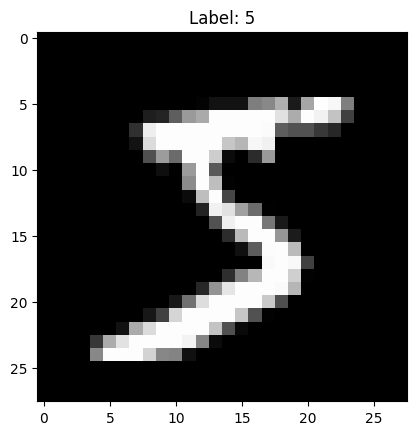

In [14]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [15]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [18]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [21]:
model = models.Sequential()

In [22]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.8959 - loss: 0.3336 - val_accuracy: 0.9813 - val_loss: 0.0622
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9822 - loss: 0.0565 - val_accuracy: 0.9902 - val_loss: 0.0405
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9886 - loss: 0.0366 - val_accuracy: 0.9887 - val_loss: 0.0389
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.9922 - loss: 0.0246 - val_accuracy: 0.9912 - val_loss: 0.0368
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9943 - loss: 0.0165 - val_accuracy: 0.9905 - val_loss: 0.0326


In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'test loss is: {test_loss}')
print(f'test accuracy is: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9886 - loss: 0.0354
test loss is: 0.028428146615624428
test accuracy is: 0.9908999800682068


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
predicted value: 7
actual value: 7


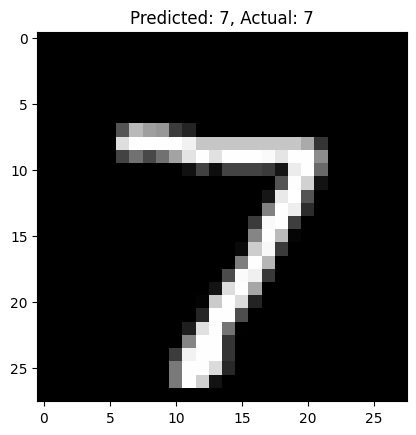

In [45]:
prediction = model.predict(x_test)

print(f'predicted value: {np.argmax(prediction[0])}')
print(f'actual value: {y_test[0]}')

# Visualize it
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(prediction[0])}, Actual: {y_test[0]}")
plt.show()

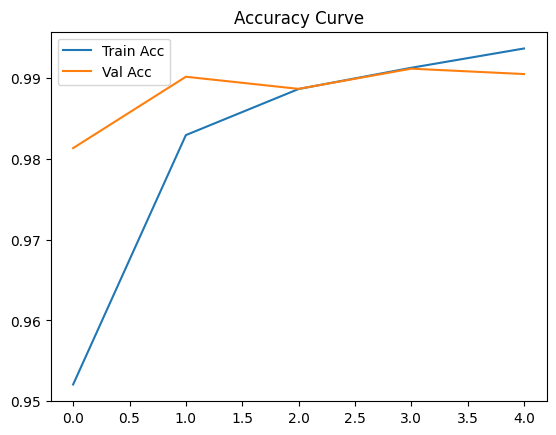

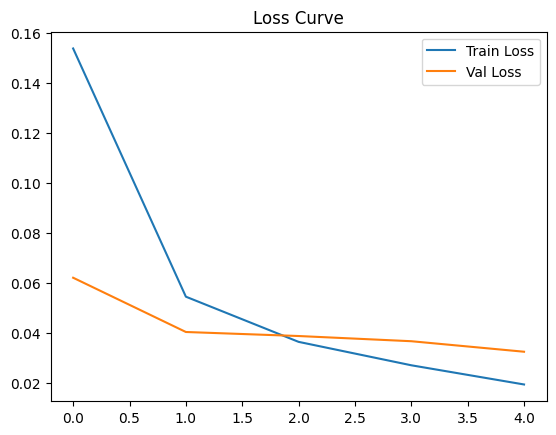

In [46]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()
